### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

# Practical activity: Time-series forecasting

**Scenario**

A real estate developer, Derek, is planning to start a new project to build family homes. He has access to historic data for the region in which he has acquired land for the project. The historic data includes the prices for houses sold in the area over a 10-year period. The data also includes information about the number of bedrooms in each house ranging from one to five rooms. Derek has asked you to analyse the data for any trends that might be evident. He wants to know the optimal number of bedrooms to maximise the profit for the project.

In this activity, we will be working with a time-series moving average to forecast the prices of houses by:

- plotting the sub-data sets
- resampling to remove noise
- using a time-series moving average.

## Prepare your workstation

In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Simple hacks to make plots look better: 

# # Colour pallete to make charts look better.
blue, = sns.color_palette("muted", 1) 

# Darkgrid, white grid, dark, white and ticks.
sns.set_style('whitegrid') 

# Font size of the axes title.
plt.rc('axes', titlesize=18) 

# Font size of the x and y labels.
plt.rc('axes', labelsize=14)    

# Font size of the tick labels.
plt.rc('xtick', labelsize=13,color='#4f4e4e') 

# Font size of the tick labels.
plt.rc('ytick', labelsize=13,color='#4f4e4e')  

# Legend font size.
plt.rc('legend', fontsize=13)

# Controls default text sizes.
plt.rc('font', size=13)          

In [3]:
# Import CSV file with Pandas.
data = pd.read_csv('raw_sales.csv', index_col=['datesold'], parse_dates=['datesold'])

# View DataFrame.
print(data.shape)
data.head()

(29580, 4)


,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


## Get to know the data

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Housing Prices')

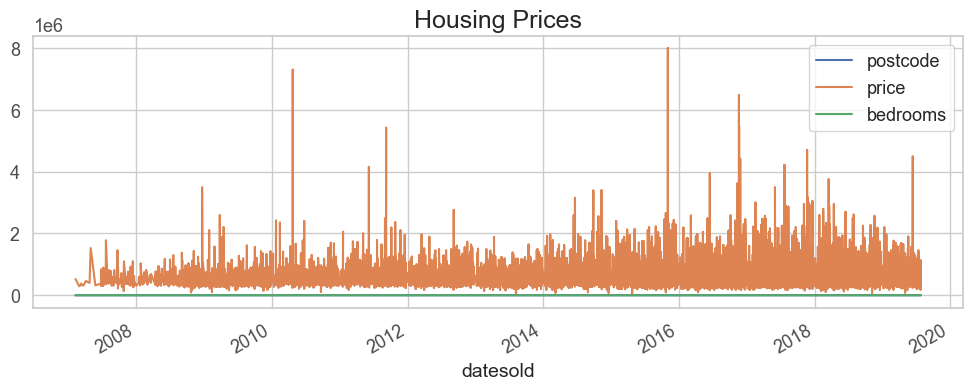

postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64

In [4]:
# Plot house prices as time-series.
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Housing Prices")
plt.show(block=False);

# Check for missing values.
data.isna().sum()

## Checking the dataset for the count of houses based on their bedrooms

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64


Text(0.5, 1.0, 'Count of number of bedrooms')

<AxesSubplot:title={'center':'Count of number of bedrooms'}, xlabel='bedrooms', ylabel='count'>

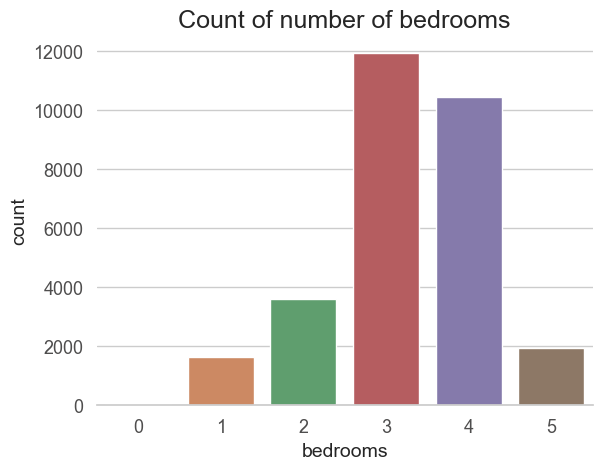

In [5]:
# Count the number of values in a specified column of the DataFrame.
print(data['bedrooms'].value_counts())

# Create a plot.
plt.title("Count of number of bedrooms")

sns.despine(left=True);
sns.countplot(x='bedrooms', data=data)

## Creating different datasets based on number of bedrooms

In [6]:
# Create a copy of the original data for convinience. 
data_sub = data.copy()


# Data set cosnsisting of houses with 1 bedroom: 
df_1 = data_sub[data_sub['bedrooms']==1]
print(df_1.shape)


# Data set cosnsisting of houses with 2 bedrooms: 
df_2 = data_sub[data_sub['bedrooms']==2]
print(df_2.shape)


# Data set cosnsisting of houses with 3 bedrooms: 
df_3 = data_sub[data_sub['bedrooms']==3]
print(df_3.shape)


# Data set cosnsisting of houses with 4 bedrooms: 
df_4 = data_sub[data_sub['bedrooms']==4]
print(df_4.shape)


# Data set cosnsisting of houses with 5 bedrooms: 
df_5 = data_sub[data_sub['bedrooms']==5]
print(df_5.shape)

(1627, 4)
(3598, 4)
(11933, 4)
(10442, 4)
(1950, 4)


## Detect outliers

(array([613., 982.,  27.,   2.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([  85000.,  304500.,  524000.,  743500.,  963000., 1182500.,
        1402000., 1621500., 1841000., 2060500., 2280000.]),
 <BarContainer object of 10 artists>)

(array([1.526e+03, 1.846e+03, 1.950e+02, 2.300e+01, 6.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  96000.,  391400.,  686800.,  982200., 1277600., 1573000.,
        1868400., 2163800., 2459200., 2754600., 3050000.]),
 <BarContainer object of 10 artists>)

(array([1.0209e+04, 1.6280e+03, 8.4000e+01, 8.0000e+00, 1.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  69000.,  710100., 1351200., 1992300., 2633400., 3274500.,
        3915600., 4556700., 5197800., 5838900., 6480000.]),
 <BarContainer object of 10 artists>)

(array([8.528e+03, 1.767e+03, 1.260e+02, 1.600e+01, 1.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  56500.,  850850., 1645200., 2439550., 3233900., 4028250.,
        4822600., 5616950., 6411300., 7205650., 8000000.]),
 <BarContainer object of 10 artists>)

(array([1.289e+03, 5.590e+02, 7.400e+01, 1.700e+01, 7.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 210000.,  919000., 1628000., 2337000., 3046000., 3755000.,
        4464000., 5173000., 5882000., 6591000., 7300000.]),
 <BarContainer object of 10 artists>)

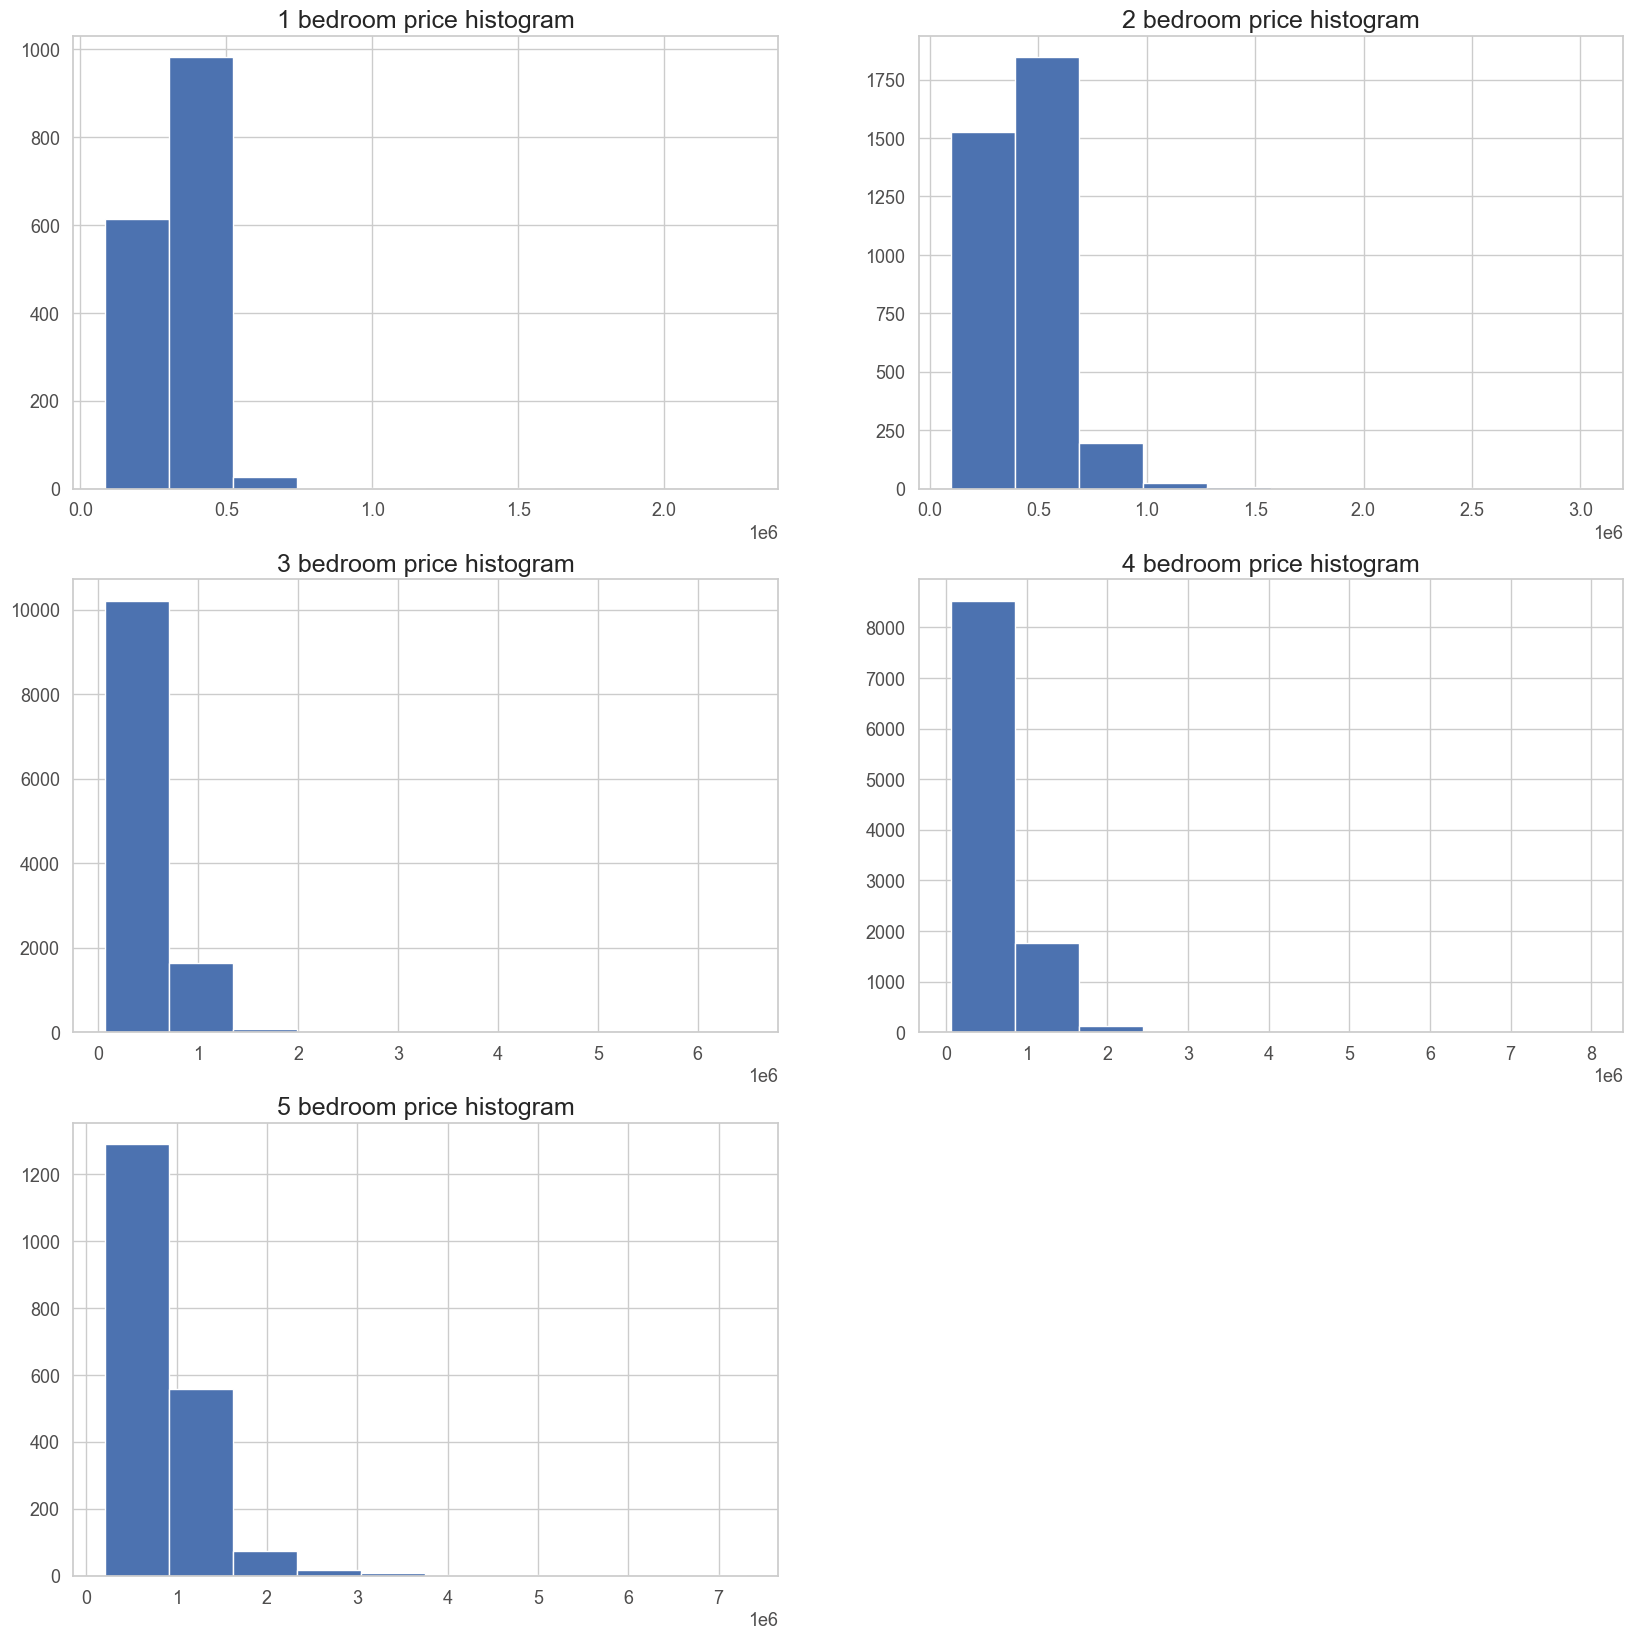

In [7]:
# Set plot size.
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(20,20))

# 1 bedroom:
axes[0][0].hist(df_1['price'])
axes[0][0].title.set_text("1 bedroom price histogram")

# 2 bedroom:
axes[0][1].hist(df_2['price'])
axes[0][1].title.set_text("2 bedroom price histogram")

# 3 bedroom:
axes[1][0].hist(df_3['price'])
axes[1][0].title.set_text("3 bedroom price histogram")

# 4 bedroom:
axes[1][1].hist(df_4['price'])
axes[1][1].title.set_text("4 bedroom price histogram")

# 5 bedroom:
axes[2][0].hist(df_5['price'])
axes[2][0].title.set_text("5 bedroom price histogram")


fig.delaxes(axes[2][1])

plt.show()

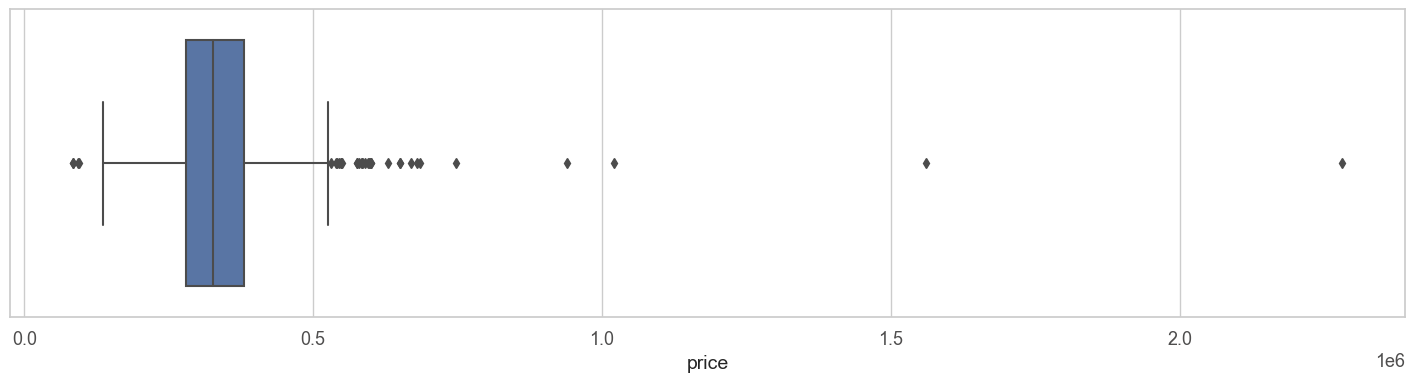

In [8]:
# Create a boxplot for 1 bedroom.
# Set figure size.
fig = plt.figure(figsize=(18, 4))

# Create boxplot.
ax = sns.boxplot(x=df_1['price'], whis=1.5)

## Remove outliers

In [9]:
# The columns you want to search for outliers in.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_1[cols].quantile(0.25) 
Q3 = df_1[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_1[cols] < (Q1 - 1.5 * IQR)) | (df_1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
df_1_non_outlier = df_1[condition]
df_1_non_outlier.shape

price    100250.0
dtype: float64

(1592, 4)

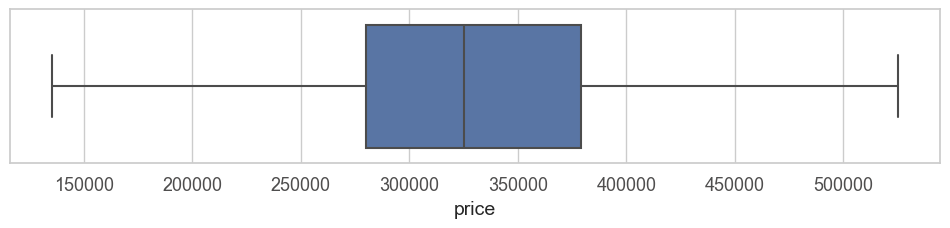

In [10]:
# Plot to see if outliers have been removed: 
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_1_non_outlier['price'],whis=1.5)

## Additional code

### Data set with 2 bedrooms (`df_2`)

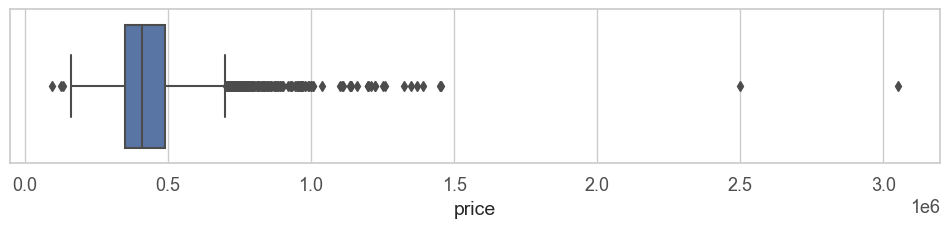

In [11]:
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=df_2['price'], whis=1.5);

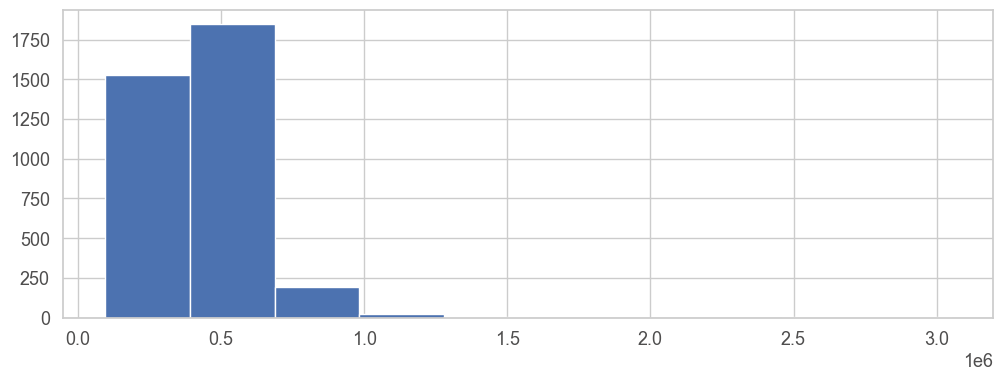

In [12]:
# Histogram plot.
fig = df_2.price.hist(figsize = (12, 4))

In [13]:
# Outlier removal from houses with 2 bedrooms.
# The columns you want to search for outliers.
cols = ['price']

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_2[cols].quantile(0.25)
Q3 = df_2[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_2[cols] < (Q1 - 1.5 * IQR)) | (df_2[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
df_2_non_outlier = df_2[condition]
df_2_non_outlier.shape

price    140000.0
dtype: float64

(3387, 4)

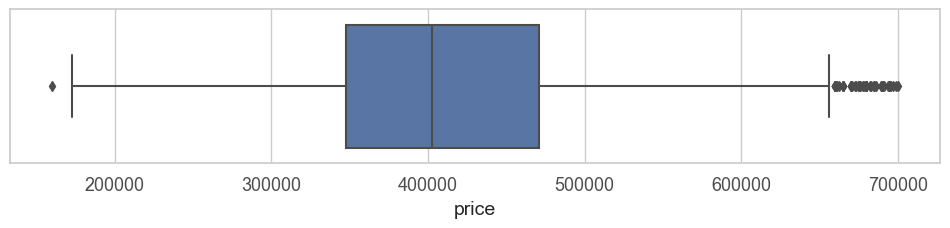

In [14]:
# Plot to see if outliers have been removed: 
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_2_non_outlier['price'],whis=1.5);

### Data set with 3 bedrooms (`df_3`)

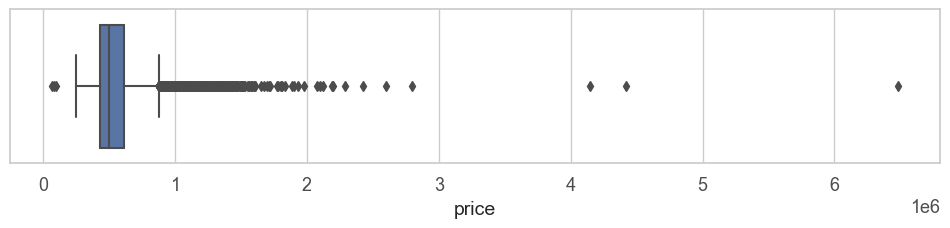

In [15]:
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_3['price'], whis=1.5);

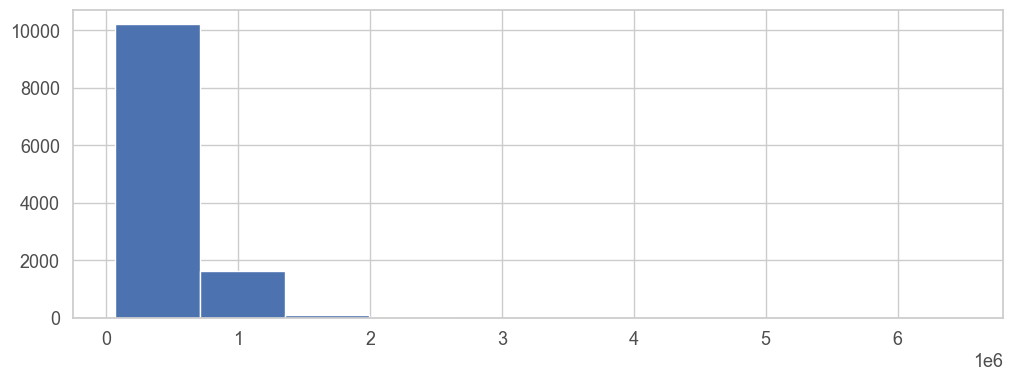

In [16]:
# Histogram plot.
fig = df_3.price.hist(figsize = (12, 4))

In [17]:
# Removing outlier from dataset with 3 bedrooms: 
# The columns you want to search for outliers.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_3[cols].quantile(0.25)
Q3 = df_3[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_3[cols] < (Q1 - 1.5 * IQR)) | (df_3[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
df_3_non_outlier = df_3[condition]
df_3_non_outlier.shape

price    177500.0
dtype: float64

(11254, 4)

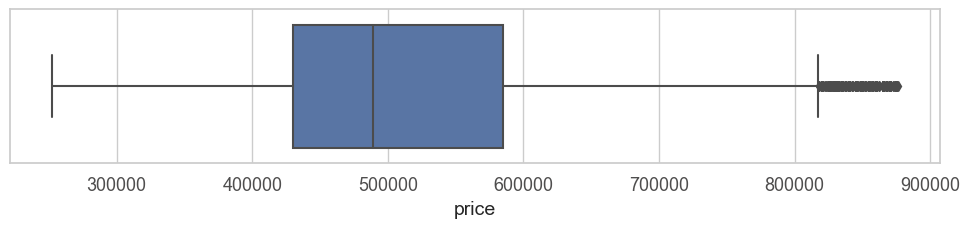

In [18]:
# Plot to see if outliers have been removed: 
# whis = multiplicative factor.
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_3_non_outlier['price'],whis=1.5)

### Data set with 4 bedrooms (`df_4`)

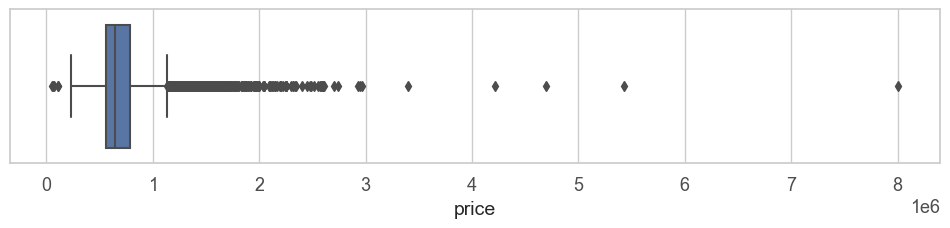

In [19]:
# whis = multiplicative factor
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_4['price'],whis=1.5);

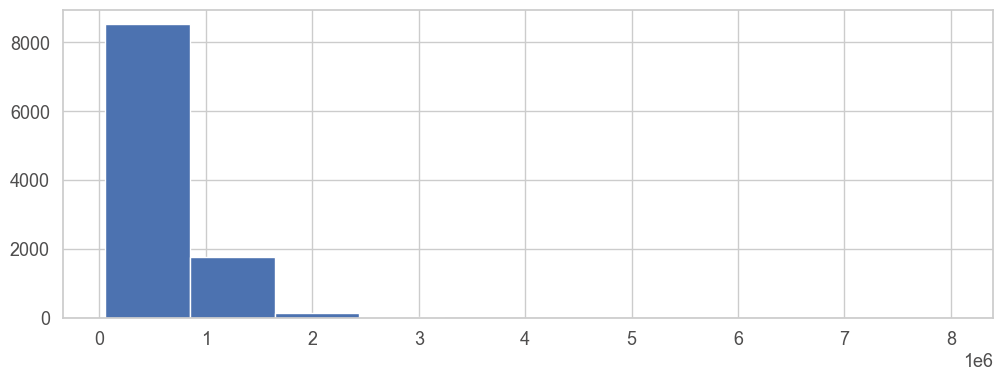

In [20]:
# Histogram plot.
fig = df_4.price.hist(figsize = (12, 4))

In [21]:
# Removing outlier from dataset with 4 bedrooms.
# The columns you want to search for outliers.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_4[cols].quantile(0.25) 
Q3 = df_4[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_4[cols] < (Q1 - 1.5 * IQR)) | (df_4[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
df_4_non_outlier = df_4[condition]
df_4_non_outlier.shape

price    230500.0
dtype: float64

(9772, 4)

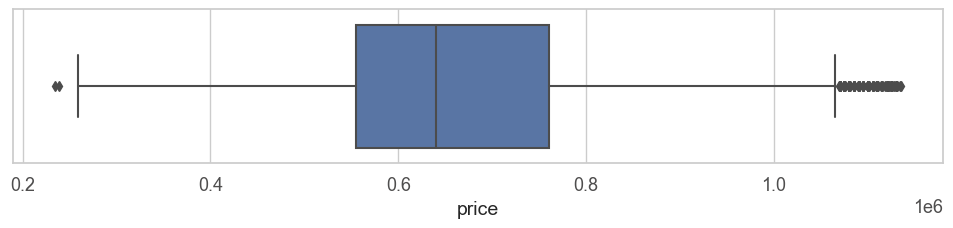

In [22]:
# Plot to see if outliers have been removed: 
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_4_non_outlier['price'], whis=1.5);

### Data set with 5 bedrooms (`df_5`)

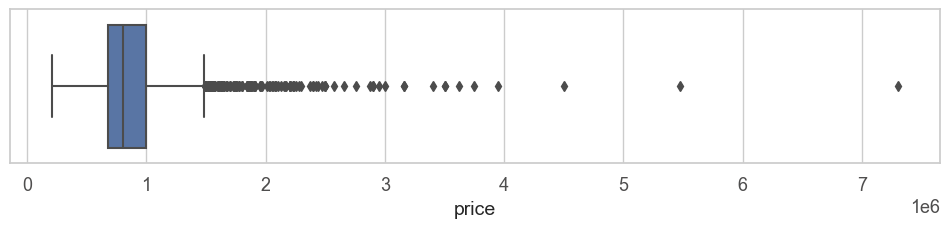

In [23]:
# whis = multiplicative factor
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_5['price'], whis=1.5)

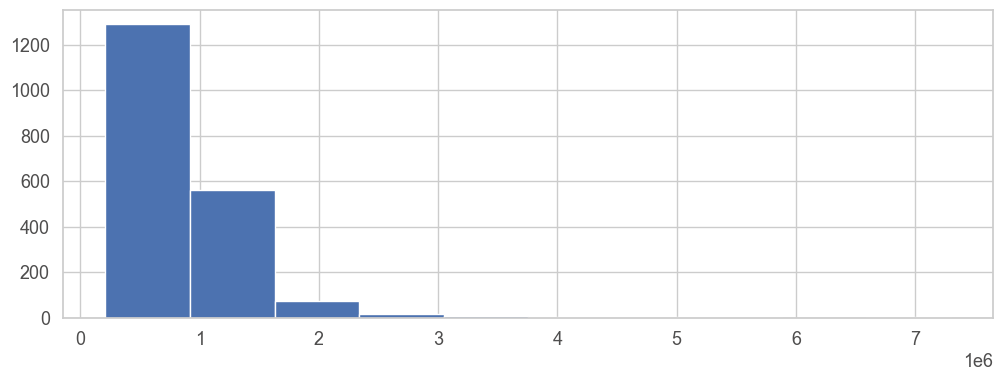

In [24]:
# Histogram plot.
fig = df_5.price.hist(figsize = (12, 4))

In [25]:
# Removing outlier from dataset with 5 bedrooms: 
# The columns you want to search for outliers.
cols = ['price'] 

# Calculate quantiles and IQR.
# Same as np.percentile but maps (0,1) and not (0,100).
Q1 = df_5[cols].quantile(0.25) 
Q3 = df_5[cols].quantile(0.75)
IQR = Q3 - Q1
IQR

# # Return a boolean array of the rows with (any) non-outlier column values.
condition = ~((df_5[cols] < (Q1 - 1.5 * IQR)) | (df_5[cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter our dataframe based on condition.
df_5_non_outlier = df_5[condition]
df_5_non_outlier.shape

price    325000.0
dtype: float64

(1809, 4)

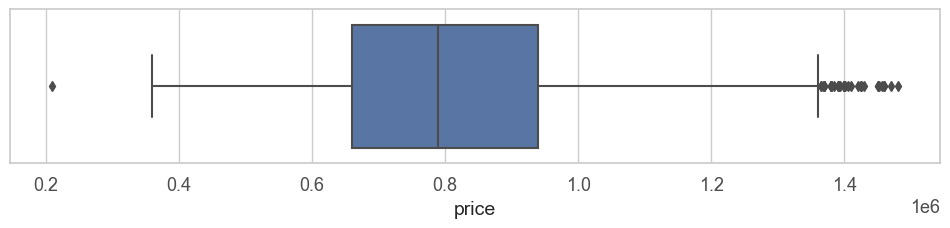

In [26]:
# Plot to see if outliers have been removed: 
fig = plt.subplots(figsize=(12, 2))

ax = sns.boxplot(x=df_5_non_outlier['price'], whis=1.5)

# 

# 

# Time-series forecasting
## Plot the subset DataFrames

135500

525000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot for house with 1 bedroom')

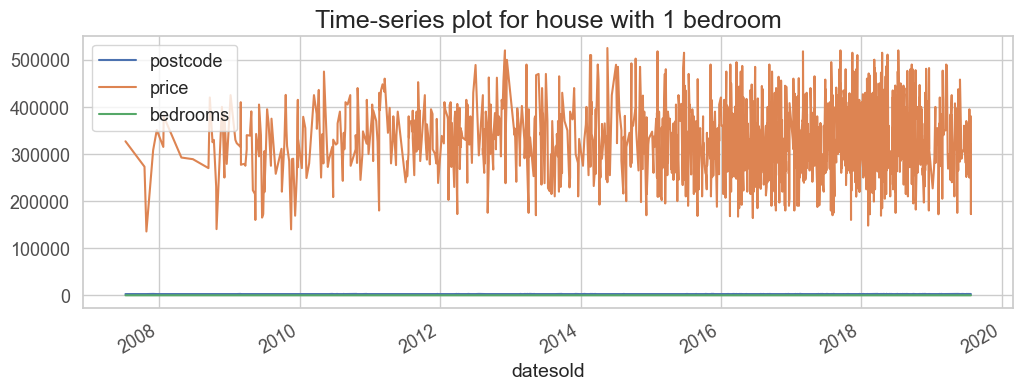

In [27]:
# Create a plot for 1 bedroom.
# Calculate max and min.
df_1_non_outlier['price'].min()
df_1_non_outlier['price'].max()


# Plotting the time series data.
df_1_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot for house with 1 bedroom")
plt.show(block=False)

160000

700000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot for house with 1 bedroom')

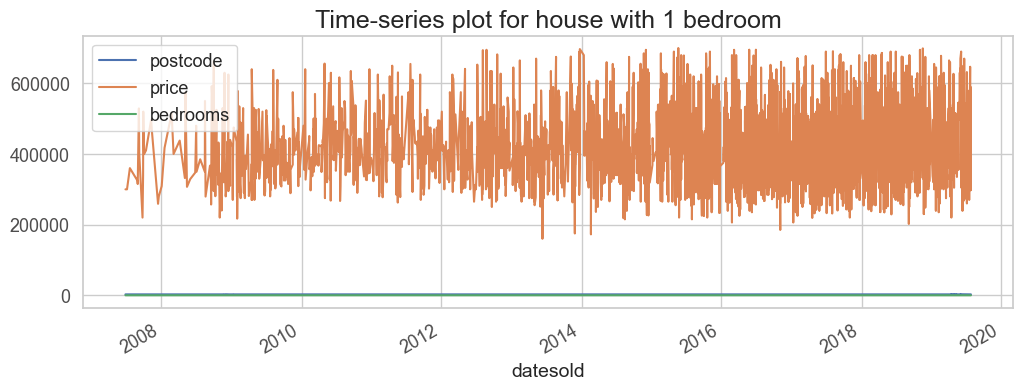

In [28]:
# Create a plot for 2 bedrooms.
# Calculate max and min.
df_2_non_outlier['price'].min()
df_2_non_outlier['price'].max()


# Plotting the time series data.
df_2_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot for house with 1 bedroom")
plt.show(block=False)

252500

876000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot for house with 1 bedroom')

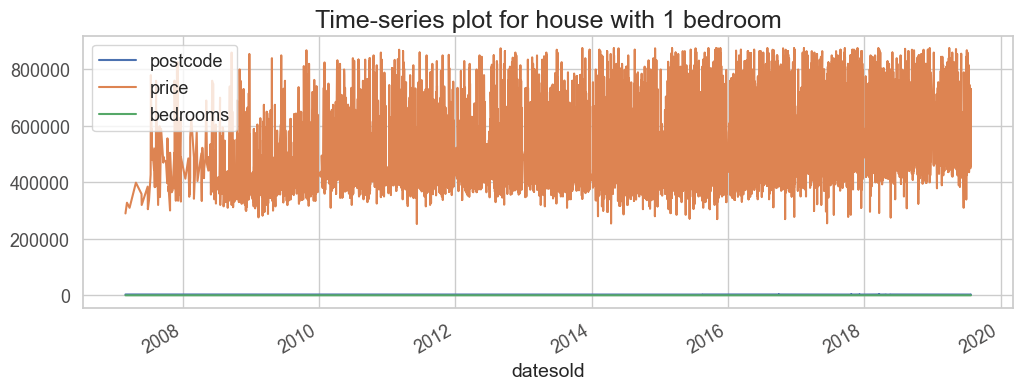

In [29]:
# Create a plot for 3 bedrooms.
# Calculate max and min.
df_3_non_outlier['price'].min()
df_3_non_outlier['price'].max()


# Plotting the time series data.
df_3_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot for house with 1 bedroom")
plt.show(block=False)

235000

1135001

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot for house with 1 bedroom')

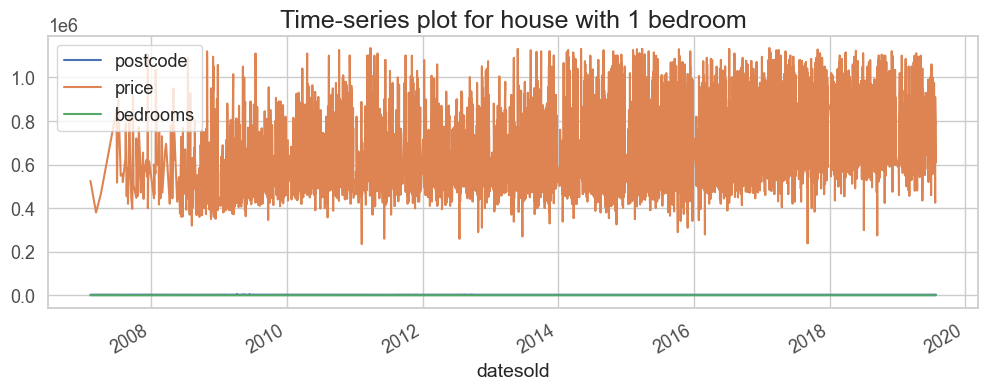

In [30]:
# Create a plot for 4 bedrooms.
# Calculate max and min.
df_4_non_outlier['price'].min()
df_4_non_outlier['price'].max()


# Plotting the time series data.
df_4_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot for house with 1 bedroom")
plt.show(block=False)

210000

1480000

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot for house with 1 bedroom')

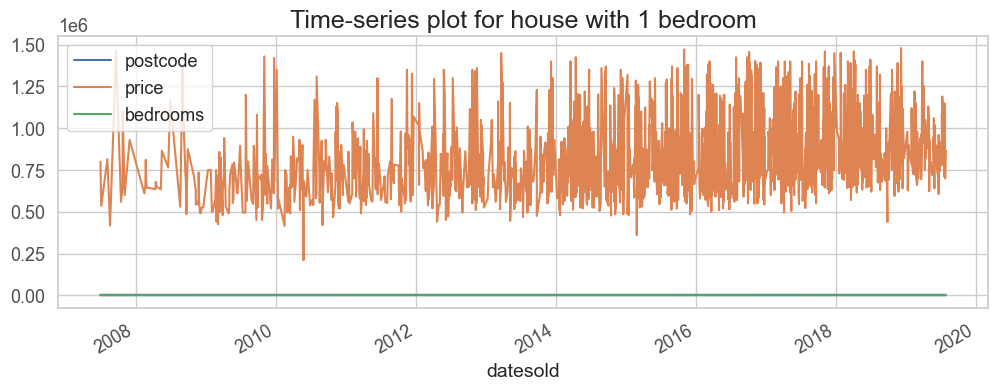

In [31]:
# Create a plot for 5 bedrooms.
# Calculate max and min.
df_5_non_outlier['price'].min()
df_5_non_outlier['price'].max()


# Plotting the time series data.
df_5_non_outlier.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot for house with 1 bedroom")
plt.show(block=False)

## Resample the sub-data sets to remove noise

,postcode,price,bedrooms
datesold,,,
2007-07-31,2600.0,327000.0,1.0
2007-08-31,NaN,NaN,NaN
2007-09-30,NaN,NaN,NaN
2007-10-31,2608.5,204250.0,1.0
2007-11-30,2912.0,308000.0,1.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot after resampling')

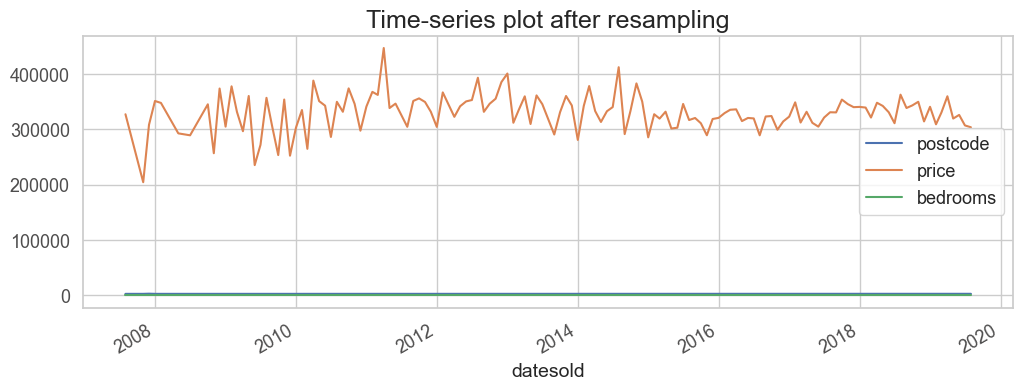

In [32]:
# 1 bedroom:
# Resampling dataset with 1 bedroom:
df_1_res = df_1_non_outlier.resample('M').mean()
df_1_res.head()


# Dropping the missing values: 
df_1_res.dropna(inplace= True)
df_1_res.isna().sum()


# Plotting the time series data.
df_1_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False)

,postcode,price,bedrooms
datesold,,,
2007-06-30,2606.0,300000.0,2.0
2007-07-31,2607.5,330000.0,2.0
2007-08-31,2905.5,320000.0,2.0
2007-09-30,2609.6,401800.0,2.0
2007-10-31,2612.0,405000.0,2.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot after resampling')

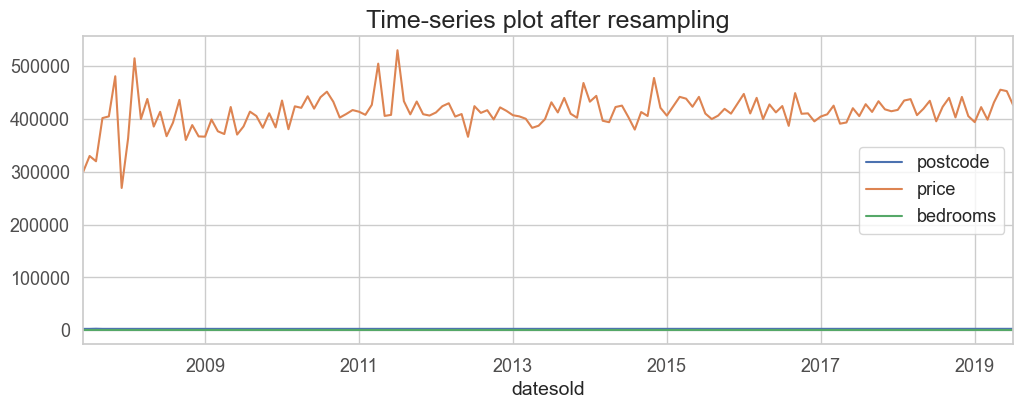

In [33]:
# 2 bedrooms:
# Resampling dataset with 2 bedrooms.
df_2_res = df_2_non_outlier.resample('M').mean()
df_2_res.head()


# Dropping the missing values: 
df_2_res.dropna(inplace= True)
df_2_res.isna().sum()


# Plotting the time series data.
df_2_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False)

,postcode,price,bedrooms
datesold,,,
2007-02-28,2906.0,290000.0,3.0
2007-03-31,2905.5,319000.0,3.0
2007-04-30,2607.0,399000.0,3.0
2007-05-31,2904.0,339500.0,3.0
2007-06-30,2904.0,345000.0,3.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot after resampling')

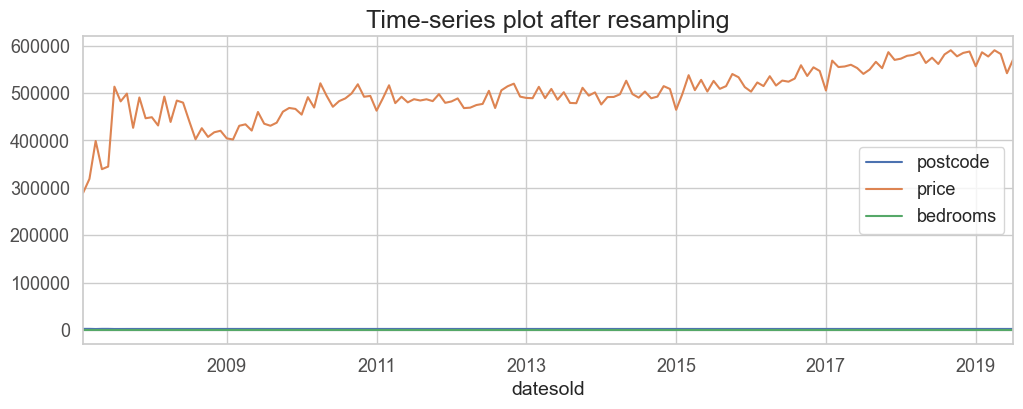

In [34]:
# 3 bedrooms:
# Resampling dataset with 1 bedroom.
df_3_res = df_3_non_outlier.resample('M').mean()
df_3_res.head()

# Dropping the missing values: 
df_3_res.dropna(inplace= True)
df_3_res.isna().sum()

# Plotting the time series data.
df_3_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False)

,postcode,price,bedrooms
datesold,,,
2007-02-28,2607.000000,525000.000000,4.0
2007-03-31,2905.000000,380000.000000,4.0
2007-04-30,2905.000000,465000.000000,4.0
2007-05-31,NaN,NaN,NaN
2007-06-30,2710.333333,710666.666667,4.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot after resampling')

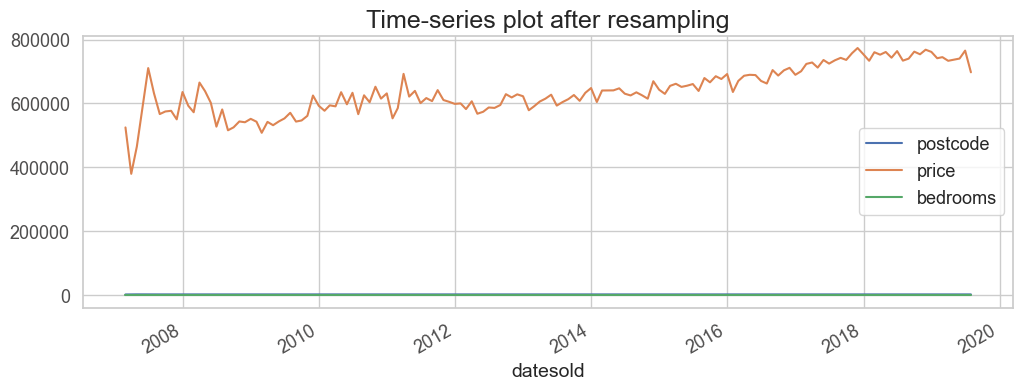

In [35]:
# 4 bedrooms:
# Resampling dataset with 4 bedrooms.
df_4_res = df_4_non_outlier.resample('M').mean()
df_4_res.head()

# Dropping the missing values: 
df_4_res.dropna(inplace= True)
df_4_res.isna().sum()

# Plotting the time series data.
df_4_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False)

,postcode,price,bedrooms
datesold,,,
2007-07-31,2764.500000,6.675000e+05,5.0
2007-08-31,2903.000000,6.165000e+05,5.0
2007-09-30,2603.000000,1.460000e+06,5.0
2007-10-31,2811.333333,7.683333e+05,5.0
2007-11-30,2611.000000,6.000000e+05,5.0


postcode    0
price       0
bedrooms    0
dtype: int64

<AxesSubplot:xlabel='datesold'>

Text(0.5, 1.0, 'Time-series plot after resampling')

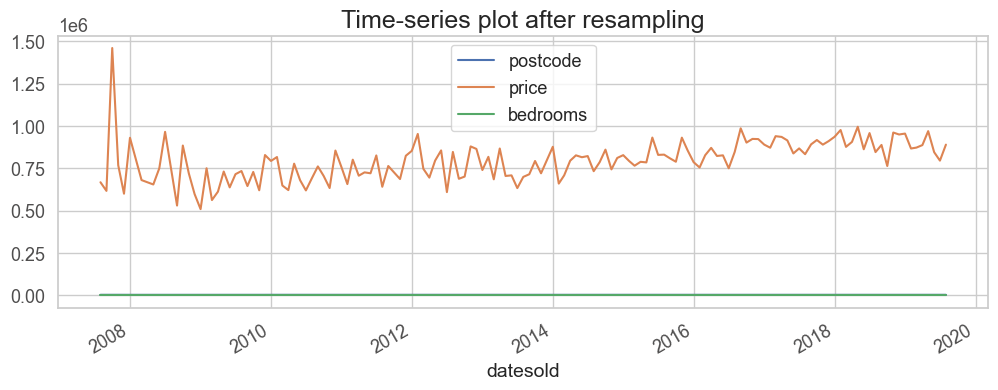

In [36]:
# 5 bedrooms:
# Resampling dataset with 5 bedrooms.
df_5_res = df_5_non_outlier.resample('M').mean()
df_5_res.head()

# Dropping the missing values: 
df_5_res.dropna(inplace= True)
df_5_res.isna().sum()

# Plotting the time series data.
df_5_res.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title("Time-series plot after resampling")
plt.show(block=False)

## Calculate and plot the simple moving average

In [37]:
# As discussed in tutorial video:
# This is a function to calculate and plot the simple moving average: 
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(12,4))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, 'g', label="Simple moving average trend")
    
    # Plot confidence intervals for smoothed values.
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label="Upper bound / Lower bound")
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc='best')
    plt.grid(True)

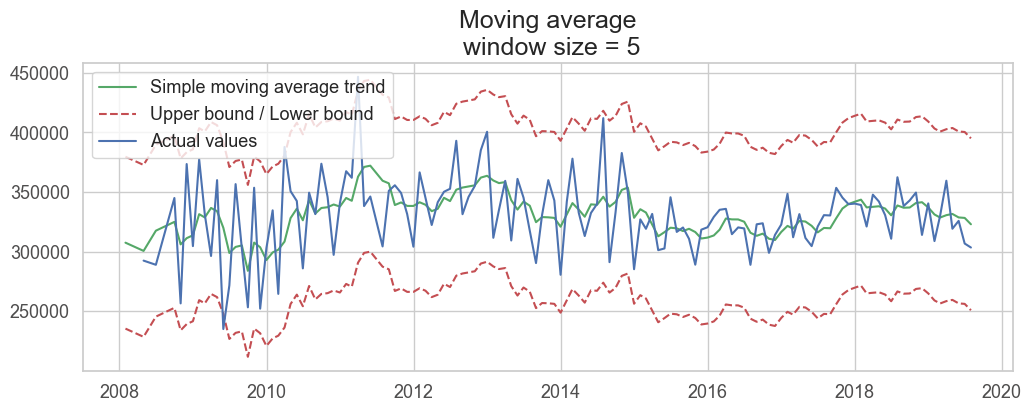

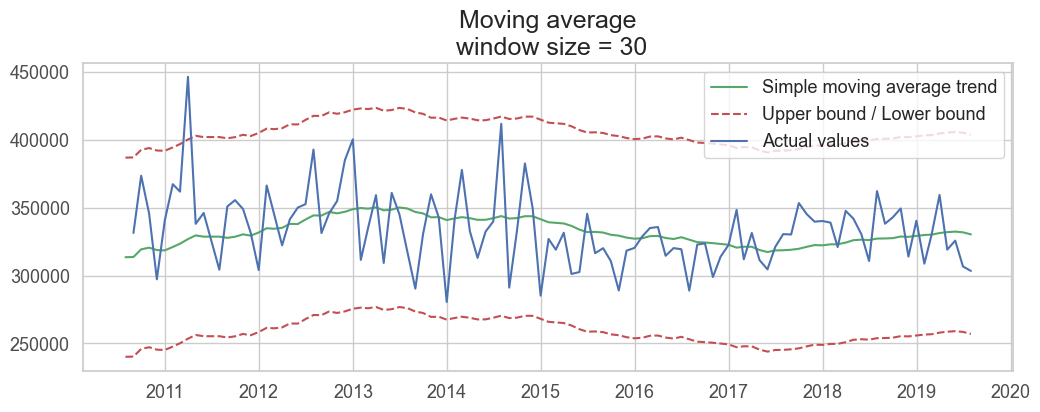

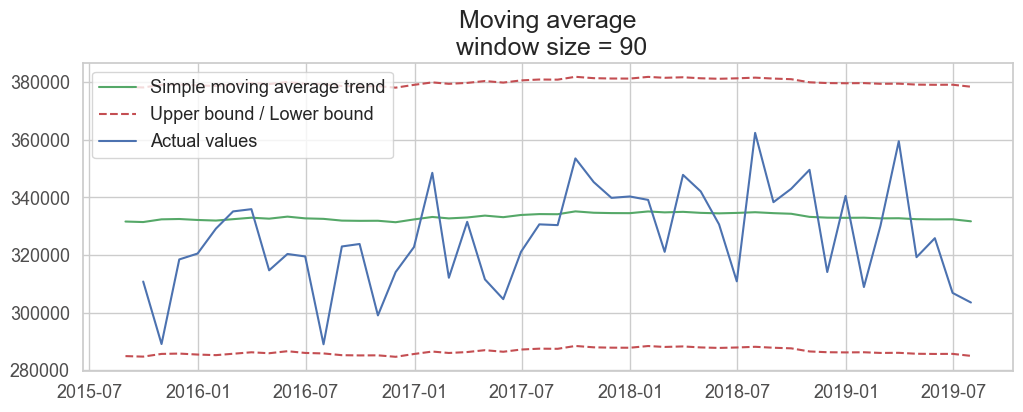

In [38]:
# 1 bedroom:
# 5 days:
plot_moving_average(df_1_res.price, 5, plot_intervals=True)

# 30-days smoothing:
plot_moving_average(df_1_res.price, 30, plot_intervals=True)

# 90-days smoothing:
plot_moving_average(df_1_res.price, 90, plot_intervals=True)

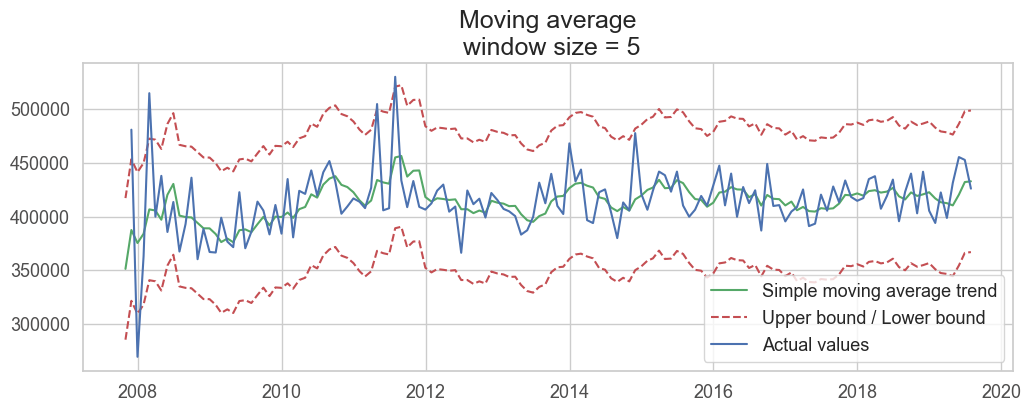

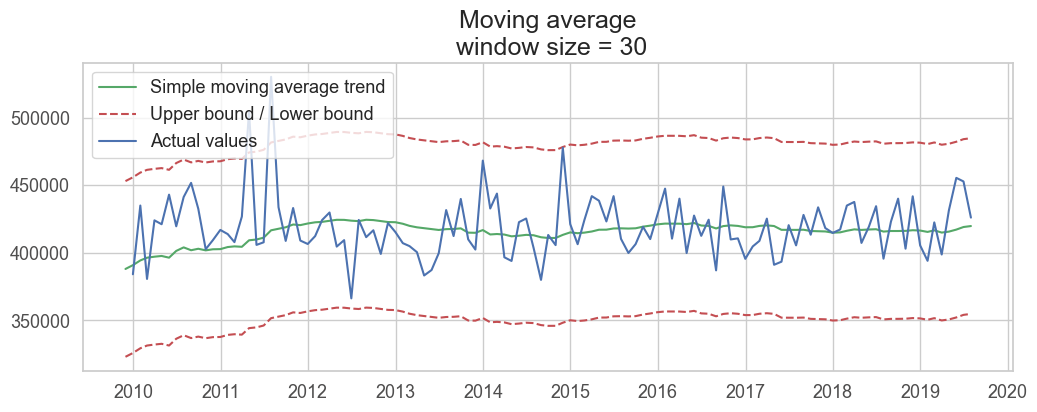

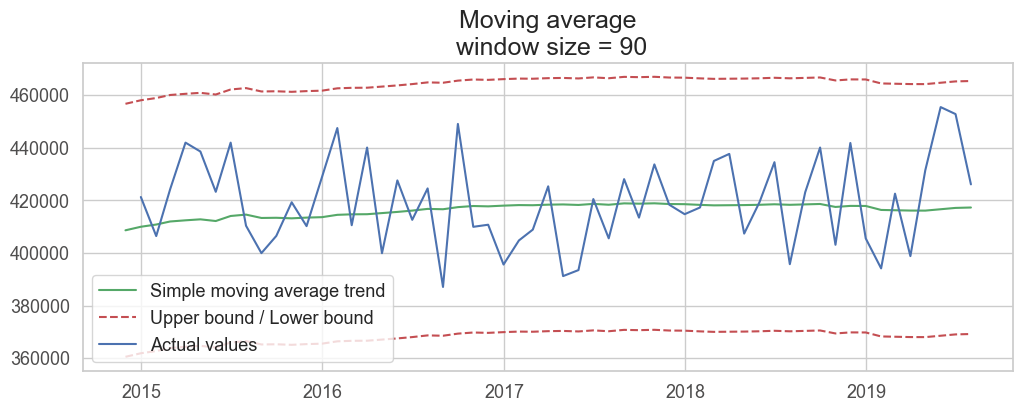

In [39]:
# 2 bedrooms:
# 5 days:
plot_moving_average(df_2_res.price, 5, plot_intervals=True)

# 30-days smoothing:
plot_moving_average(df_2_res.price, 30, plot_intervals=True)

# 90-days smoothing:
plot_moving_average(df_2_res.price, 90, plot_intervals=True)

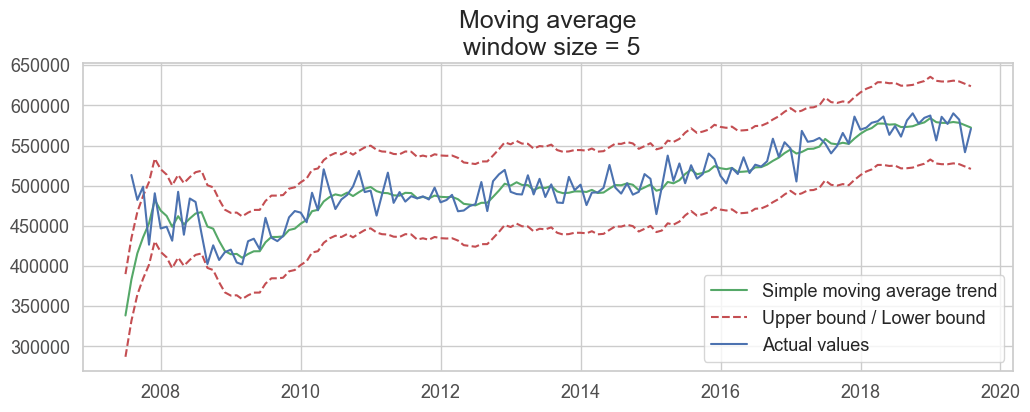

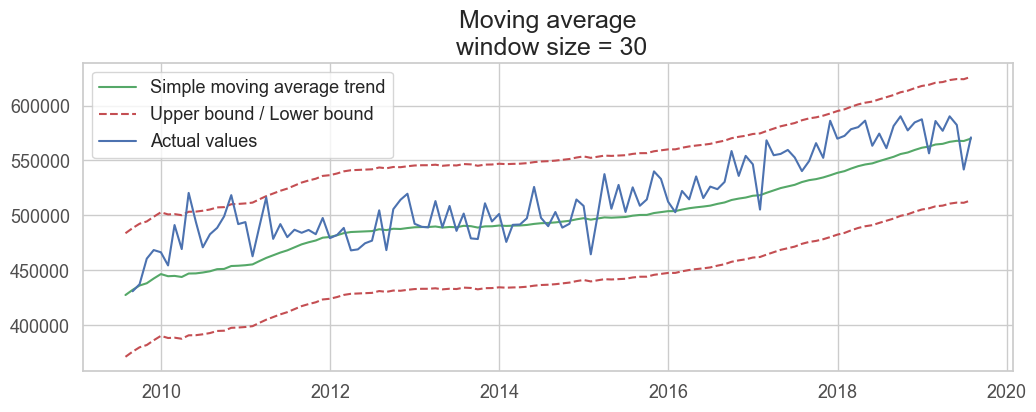

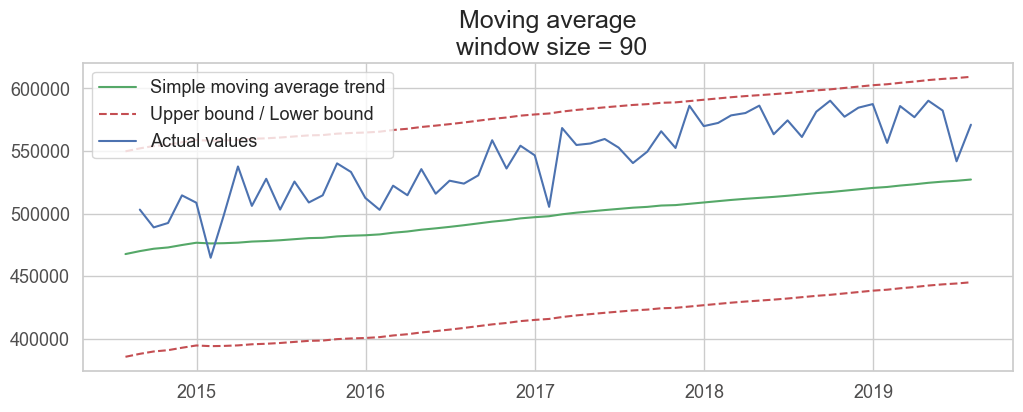

In [40]:
# 3 bedrooms:
# 5 days:
plot_moving_average(df_3_res.price, 5, plot_intervals=True)

# 30-days smoothing:
plot_moving_average(df_3_res.price, 30, plot_intervals=True)

# 90-days smoothing:
plot_moving_average(df_3_res.price, 90, plot_intervals=True)

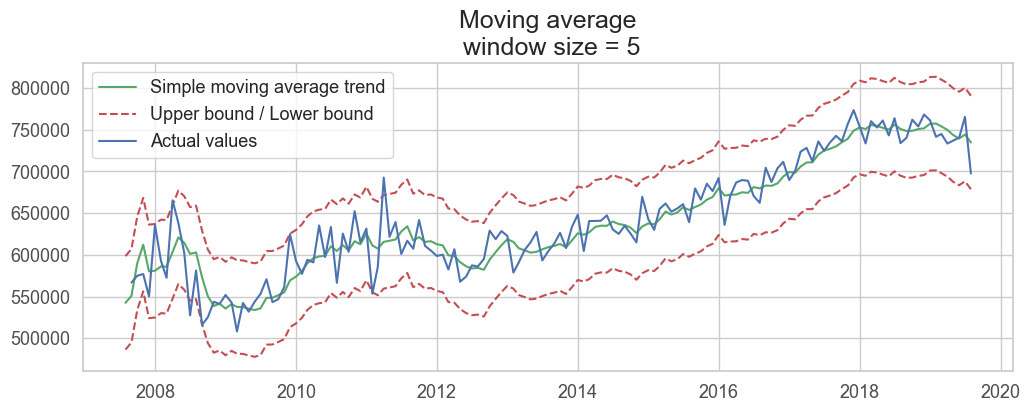

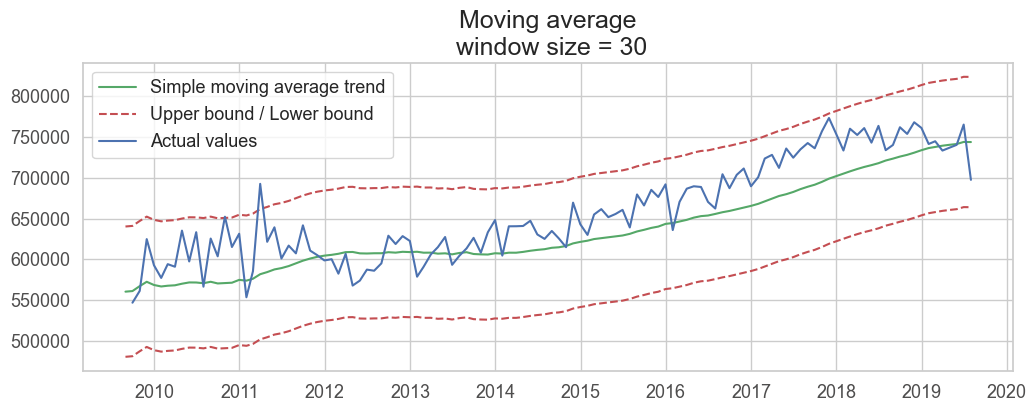

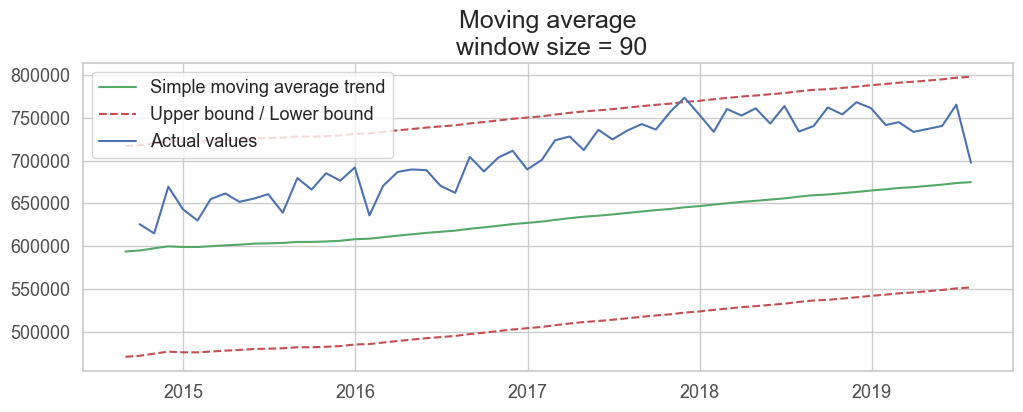

In [41]:
# 4 bedrooms:
# 5 days:
plot_moving_average(df_4_res.price, 5, plot_intervals=True)

# 30-days smoothing:
plot_moving_average(df_4_res.price, 30, plot_intervals=True)

# 90-days smoothing:
plot_moving_average(df_4_res.price, 90, plot_intervals=True)

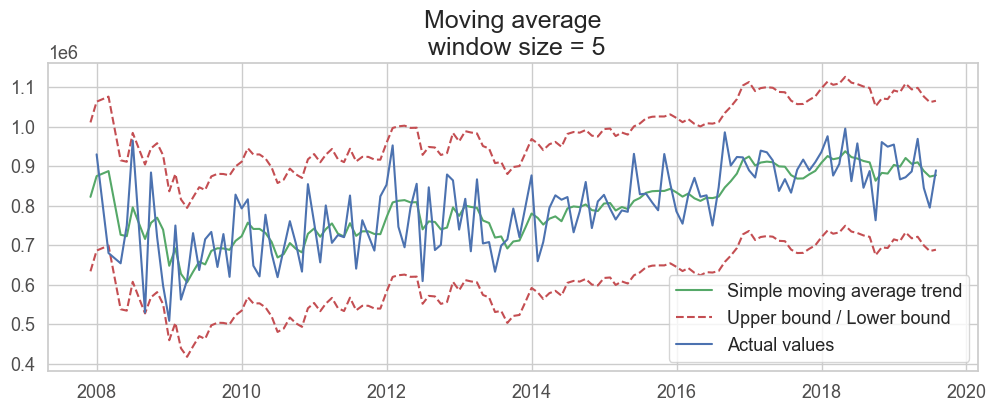

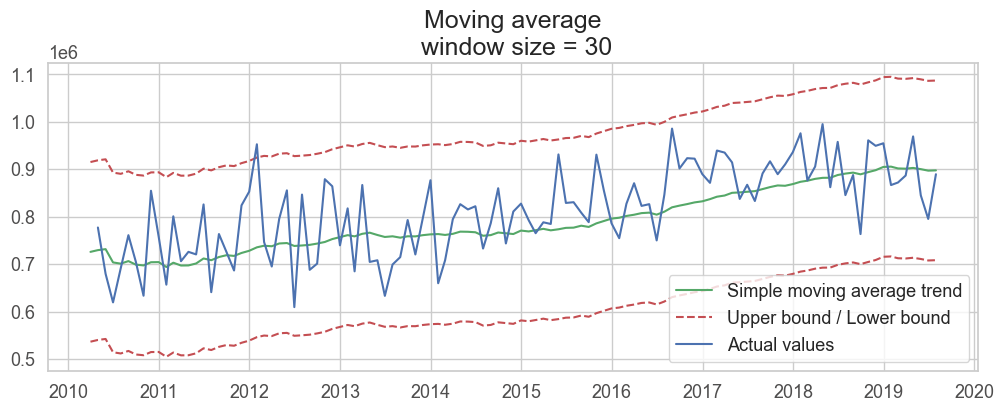

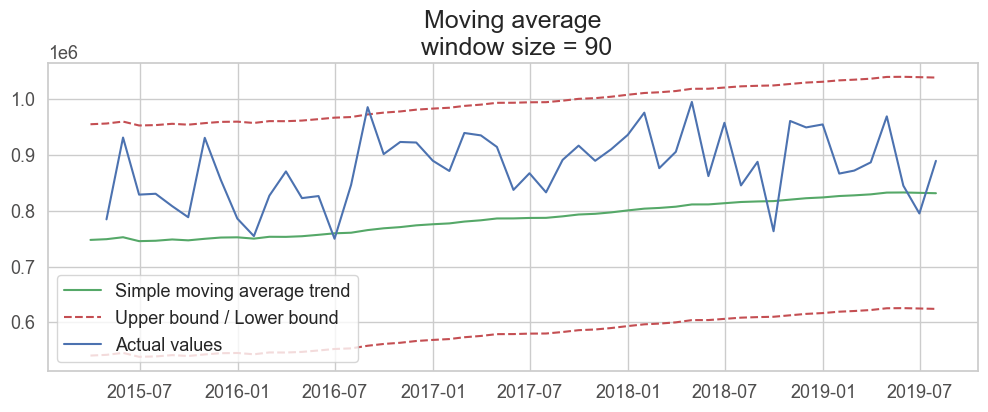

In [42]:
# 5 bedrooms:
# 5 days:
plot_moving_average(df_5_res.price, 5, plot_intervals=True)

# 30-days smoothing:
plot_moving_average(df_5_res.price, 30, plot_intervals=True)

# 90-days smoothing:
plot_moving_average(df_5_res.price, 90, plot_intervals=True)